In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
fake_df = pd.read_csv('../data/raw/Fake.csv')
true_df = pd.read_csv('../data/raw/True.csv')

In [3]:
print("Fake News Dataset:")
print(fake_df.head())
print(f"\nShape: {fake_df.shape}")
print(f"\nColumns: {fake_df.columns.tolist()}")


Fake News Dataset:
                                               title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  
0  December 31, 2017  
1  December 31, 2017  
2  December 30, 2017  
3  December 29, 2017  
4  December 25, 2017  

Shape: (23481, 4)

Columns: ['title', 'text', 'subject', 'date']


In [4]:
print("\n" + "="*50 + "\n")

In [5]:
print("True News Dataset:")
print(true_df.head())
print(f"\nShape: {true_df.shape}")
print(f"\nColumns: {true_df.columns.tolist()}")

True News Dataset:
                                               title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  
0  December 31, 2017   
1  December 29, 2017   
2  December 31, 2017   
3  December 30, 2017   
4  December 29, 2017   

Shape: (21417, 4)

Columns: ['title', 'text', 'subject', 'date']


In [6]:
print("\nMissing values in Fake news:")
print(fake_df.isnull().sum())


Missing values in Fake news:
title      0
text       0
subject    0
date       0
dtype: int64


In [7]:
print("\nMissing values in True news:")
print(true_df.isnull().sum())


Missing values in True news:
title      0
text       0
subject    0
date       0
dtype: int64


In [8]:
fake_df['label'] = 0  
true_df['label'] = 1

In [9]:
df = pd.concat([fake_df, true_df], ignore_index=True)

In [10]:
print(f"Combined dataset shape: {df.shape}")
print(f"\nLabel distribution:")
print(df['label'].value_counts())

Combined dataset shape: (44898, 5)

Label distribution:
label
0    23481
1    21417
Name: count, dtype: int64


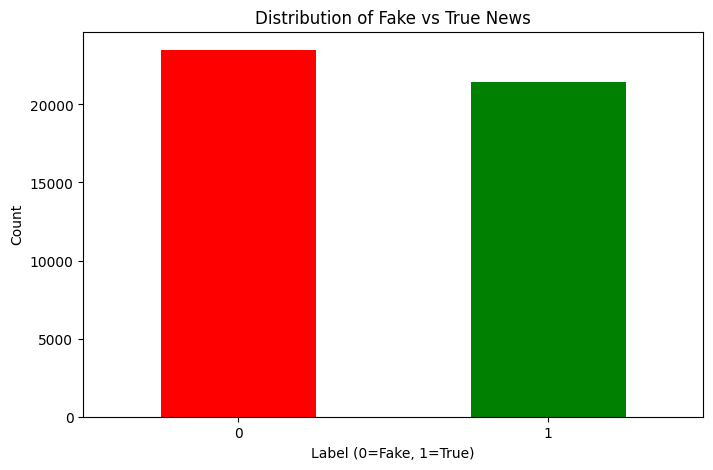

In [11]:
plt.figure(figsize=(8, 5))
df['label'].value_counts().plot(kind='bar', color=['red', 'green'])
plt.title('Distribution of Fake vs True News')
plt.xlabel('Label (0=Fake, 1=True)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [12]:
print(f"\nDataset is balanced: {df['label'].value_counts()[0] == df['label'].value_counts()[1]}")


Dataset is balanced: False


In [13]:
df['text_length'] = df['text'].apply(len)
df['title_length'] = df['title'].apply(len)

In [14]:
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

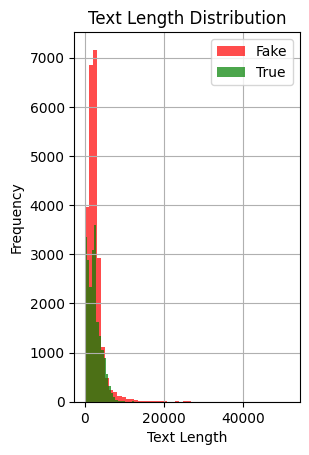

In [15]:
plt.subplot(1, 2, 1)
df[df['label']==0]['text_length'].hist(bins=50, alpha=0.7, label='Fake', color='red')
df[df['label']==1]['text_length'].hist(bins=50, alpha=0.7, label='True', color='green')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.title('Text Length Distribution')
plt.legend()

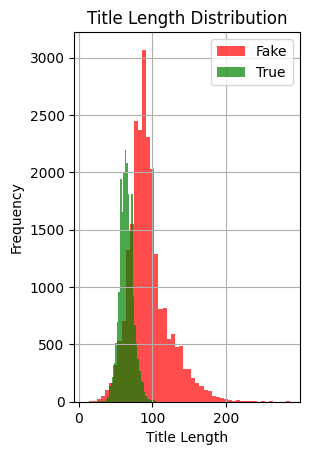

In [16]:
plt.subplot(1, 2, 2)
df[df['label']==0]['title_length'].hist(bins=50, alpha=0.7, label='Fake', color='red')
df[df['label']==1]['title_length'].hist(bins=50, alpha=0.7, label='True', color='green')
plt.xlabel('Title Length')
plt.ylabel('Frequency')
plt.title('Title Length Distribution')
plt.legend()

In [17]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [18]:
print("\nText Length Statistics:")
print(df.groupby('label')['text_length'].describe())


Text Length Statistics:
         count         mean          std  min     25%     50%     75%      max
label                                                                         
0      23481.0  2547.396235  2532.884399  1.0  1433.0  2166.0  3032.0  51794.0
1      21417.0  2383.278517  1684.835730  1.0   914.0  2222.0  3237.0  29781.0


In [19]:
print("\nSubject distribution in dataset:")
print(df['subject'].value_counts())


Subject distribution in dataset:
subject
politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: count, dtype: int64


In [20]:
print("\nSubject distribution by label:")
subject_label = pd.crosstab(df['subject'], df['label'])
print(subject_label)


Subject distribution by label:
label               0      1
subject                     
Government News  1570      0
Middle-east       778      0
News             9050      0
US_News           783      0
left-news        4459      0
politics         6841      0
politicsNews        0  11272
worldnews           0  10145


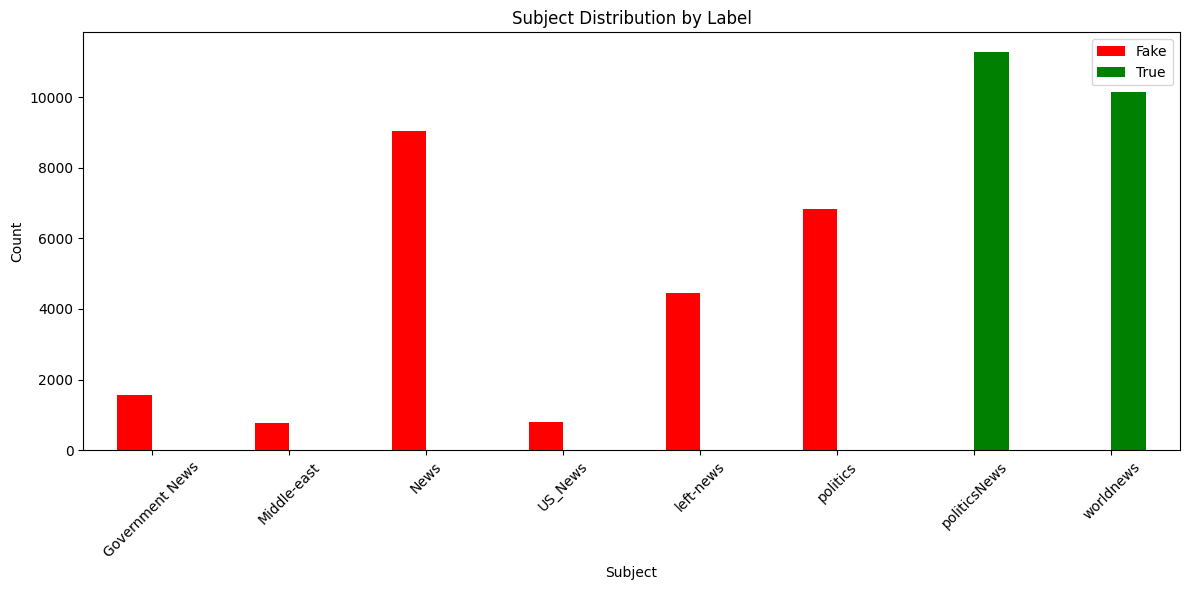

In [21]:
subject_label.plot(kind='bar', figsize=(12, 6), color=['red', 'green'])
plt.title('Subject Distribution by Label')
plt.xlabel('Subject')
plt.ylabel('Count')
plt.legend(['Fake', 'True'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [22]:
print("\n" + "="*100)
print("SAMPLE FAKE NEWS:")
print("="*100)
print(fake_df.iloc[0]['title'])
print(fake_df.iloc[0]['text'][:500])


SAMPLE FAKE NEWS:
 Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing
Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and  the very dishonest fake news media.  The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year,  President Angry Pants tweeted.  2018 will be a gr


In [23]:
print("\n" + "="*100)
print("SAMPLE TRUE NEWS:")
print("="*100)
print(true_df.iloc[0]['title'])
print(true_df.iloc[0]['text'][:500])


SAMPLE TRUE NEWS:
As U.S. budget fight looms, Republicans flip their fiscal script
WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they retur
